In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [4]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [5]:
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)

In [18]:
x_test_scaled = sc.transform(x_test)

train_errors = []
train_scores = []

test_errors = []
test_scores = []
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_scaled, y_train)
    pred_train_i = knn.predict(x_train_scaled)
    train_scores.append(accuracy_score(y_train, pred_train_i))
    train_errors.append(np.mean(pred_train_i != y_train))
    
    pred_test_i = knn.predict(x_test_scaled)
    test_scores.append(accuracy_score(y_test, pred_test_i))
    test_errors.append(np.mean(pred_test_i != y_test))

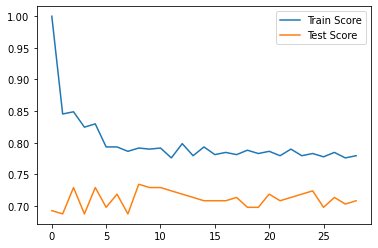

In [19]:
plt.plot(train_scores, label='Train Score')
plt.plot(test_scores, label='Test Score')
plt.legend()
plt.show()

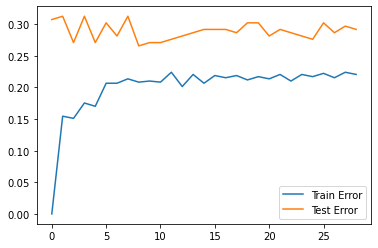

In [20]:
plt.plot(train_errors, label='Train Error')
plt.plot(test_errors, label='Test Error')
plt.legend()
plt.show()